## Genome editing library design  
#### This script runs prime editing guide RNA design for H2M database.  

**Author**: Kexin Dong  
**Date**: May 1, 2024    

In [1]:
import bioh2m as h2m

/Users/kexindong/Documents/GitHub/h2m-public/.conda/lib/python3.10/site-packages/Bio/pairwise2.py:278: BiopythonDeprecationWarning: Bio.pairwise2 has been deprecated, and we intend to remove it in a future release of Biopython. As an alternative, please consider using Bio.Align.PairwiseAligner as a replacement, and contact the Biopython developers if you still need the Bio.pairwise2 module.
  warnings.warn(


In [2]:
from pegg import prime
import pandas as pd

/Users/kexindong/Documents/GitHub/h2m-public/.conda/lib/python3.10/site-packages/Bio/pairwise2.py:278: BiopythonDeprecationWarning: Bio.pairwise2 has been deprecated, and we intend to remove it in a future release of Biopython. As an alternative, please consider using Bio.Align.PairwiseAligner as a replacement, and contact the Biopython developers if you still need the Bio.pairwise2 module.
  warnings.warn(


In [3]:
df_all = pd.read_csv('/Users/kexindong/Documents/GitHub/Output/h2m_database/PEGG/pe_human.csv')

In [10]:
len(df_all['ID'].unique())

4798

In [3]:
path_h_ref, path_m_ref = '/Users/kexindong/Documents/GitHub/Database/RefGenome/ncbi-2023-09-12/GCF_000001405.25_GRCh37.p13_genomic.fna.gz', '/Users/kexindong/Documents/GitHub/Database/RefGenome/mouse-2023-09-13/GCF_000001635.27_GRCm39_genomic.fna.gz'
chrom_dict_h, i = prime.genome_loader(path_h_ref)
chrom_dict_m, i = prime.genome_loader(path_m_ref)

# Prime Editing  
##  For Human  

In [32]:
df_all = df_all[df_all['Chromosome']!='M'].reset_index(drop=True)

In [34]:
df_all['Reference_Allele'] = [str(x) for x in df_all['Reference_Allele']]
df_all['Tumor_Seq_Allele2'] = [str(x) for x in df_all['Tumor_Seq_Allele2']]
df_all['Start_Position'] = [int(x) for x in df_all['Start_Position']]
df_all['End_Position'] = [int(x) for x in df_all['End_Position']]
df_pe_h = prime.run(df_all, 'cBioPortal', chrom_dict=chrom_dict_h, 
PAM='NGN',rankby='RF_Score', 
pegRNAs_per_mut=5, 
RTT_lengths=[5, 10, 15, 25, 30],
PBS_lengths=[8, 10, 13, 15], min_RHA_size=1, RE_sites=None, 
polyT_threshold=4,proto_size=19, 
context_size=120, before_proto_context=5, 
sensor_length=60,sensor_orientation='reverse-complement', sensor=True)

In [14]:
df_pe = pd.read_csv('/Users/kexindong/Documents/GitHub/Output/h2m_database/PEGG/pe_result_all.csv')

In [37]:
df_be = pd.read_csv('/Users/kexindong/Documents/GitHub/Output/h2m_database/BEGG/be_result_all.csv')

In [12]:
df_pe_h = pd.read_csv('/Users/kexindong/Documents/GitHub/Output/h2m_database/PEGG/pe_human_result.csv')

In [42]:
df_be.columns

Index(['mutation_idx', 'Hugo_Symbol', 'Start_Position', 'End_Position',
       'Reference_Allele', 'Tumor_Seq_Allele2', 'Variant_Type', 'ID',
       'Chromosome', 'seq_start', 'seq_end', 'wt_w_context', 'alt_w_context',
       'left_context', 'right_context', 'REF', 'ALT', 'PAM_start', 'PAM_end',
       'PAM', 'PAM_strand', 'Protospacer_30', 'Protospacer',
       'Protospacer_Location', 'Ideal_Edit_Window', 'Editor',
       'OnTarget_Azimuth_Score', 'sensor_wt', 'sensor_alt',
       'sensor_orientation', 'sensor_error', 'contains_polyT_terminator'],
      dtype='object')

In [51]:
df_be = df_be.drop_duplicates(subset=list(df_be.columns)[1:]).reset_index(drop=True)
df_be.to_csv('/Users/kexindong/Documents/GitHub/Output/h2m_database/BEGG/be_result_all.csv',index=False)

In [29]:
df_pe = df_pe.drop_duplicates(subset=list(df_pe.columns)[1:]).reset_index(drop=True)
df_pe.to_csv('/Users/kexindong/Documents/GitHub/Output/h2m_database/PEGG/pe_result_all.csv',index=False)

In [35]:
len(df_pe[[len(x.split('-'))==2 for x in df_pe['ID']]]['ID'].unique())

4944

In [52]:
df_be

,mutation_idx,Hugo_Symbol,Start_Position,End_Position,Reference_Allele,Tumor_Seq_Allele2,Variant_Type,ID,Chromosome,seq_start,...,Protospacer,Protospacer_Location,Ideal_Edit_Window,Editor,OnTarget_Azimuth_Score,sensor_wt,sensor_alt,sensor_orientation,sensor_error,contains_polyT_terminator
0,0,CD79B,62006799,62006799,A,G,SNP,AACR-H0002100,17,62006679,...,GCCCCTCTCCTTACCTCGTA,20,False,ABE,44.0,GAGGAAGATCACACCTACGAGGTAAGGAGAGGGGCAGGCC,GAGGAAGATCACACCCACGAGGTAAGGAGAGGGGCAGGCC,reverse-complement,No Error,False
1,0,CD79B,62006799,62006799,A,G,SNP,AACR-H0002100,17,62006679,...,GCCTCTCCTTACCTCGTAGG,18,False,ABE,54.0,TGGAGGAAGATCACACCTACGAGGTAAGGAGAGGGGCAGG,TGGAGGAAGATCACACCCACGAGGTAAGGAGAGGGGCAGG,reverse-complement,No Error,False
2,0,CD79B,62006799,62006799,A,G,SNP,AACR-H0002100,17,62006679,...,GTCTCCTTACCTCGTAGGTG,16,False,ABE,59.0,CATGGAGGAAGATCACACCTACGAGGTAAGGAGAGGGGCA,CATGGAGGAAGATCACACCCACGAGGTAAGGAGAGGGGCA,reverse-complement,No Error,False
3,0,CD79B,62006799,62006799,A,G,SNP,AACR-H0002100,17,62006679,...,GTAGGTGTGATCTTCCTCCA,3,False,ABE,59.0,ACAGCAAGGCTGGCATGGAGGAAGATCACACCTACGAGGT,ACAGCAAGGCTGGCATGGAGGAAGATCACACCCACGAGGT,reverse-complement,No Error,False
4,1,CD79B,62006798,62006798,T,C,SNP,AACR-H0002993,17,62006678,...,GACACCTACGAGGTAAGGAG,8,True,ABE,66.0,GCTGGGCCTGCCCCTCTCCTTACCTCGTAGGTGTGATCTT,GCTGGGCCTGCCCCTCTCCTTACCTCGCAGGTGTGATCTT,reverse-complement,No Error,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24675,1896,Xpo1,23235114,23235114,A,G,SNP,AACR-H0005028-M01-V01,11,23234994,...,GAATAGCTCAAAAATGCCGT,14,False,ABE,59.0,CTGAACAAAATGCCTACGGCATTTTTGAGCTATTTTAATA,CTGAACAAAATGCCTACGGCACTTTTGAGCTATTTTAATA,reverse-complement,No Error,False
24676,1896,Xpo1,23235114,23235114,A,G,SNP,AACR-H0005028-M01-V01,11,23234994,...,GATAGCTCAAAAATGCCGTA,13,False,ABE,60.0,CCTGAACAAAATGCCTACGGCATTTTTGAGCTATTTTAAT,CCTGAACAAAATGCCTACGGCACTTTTGAGCTATTTTAAT,reverse-complement,No Error,False
24677,1896,Xpo1,23235114,23235114,A,G,SNP,AACR-H0005028-M01-V01,11,23234994,...,GAAAAATGCCGTAGGCATTT,6,True,ABE,24.0,ACTTGAACCTGAACAAAATGCCTACGGCATTTTTGAGCTA,ACTTGAACCTGAACAAAATGCCTACGGCACTTTTGAGCTA,reverse-complement,No Error,False
24678,1896,Xpo1,23235114,23235114,A,G,SNP,AACR-H0005028-M01-V01,11,23234994,...,GTGCCGTAGGCATTTTGTTC,1,False,ABE,33.0,CTCCAACTTGAACCTGAACAAAATGCCTACGGCATTTTTG,CTCCAACTTGAACCTGAACAAAATGCCTACGGCACTTTTG,reverse-complement,No Error,True


In [44]:
df_pe_h.to_csv('/Users/kexindong/Documents/GitHub/Output/h2m_database/PEGG/pe_human_result.csv',index=False)

## For Mouse  

In [33]:
df_all = pd.read_csv('/Users/kexindong/Documents/GitHub/Output/h2m_database/PEGG/pe_mouse.csv')

In [34]:
dict_of_type = {'TNP':'ONP'}
df_all['Variant_Type'] = [dict_of_type.get(x,x) for x in df_all['Variant_Type']]

In [35]:
df_all = df_all[df_all['Chromosome']!='M'].reset_index(drop=True)

In [36]:
df_all['Reference_Allele'] = [str(x) for x in df_all['Reference_Allele']]
df_all['Tumor_Seq_Allele2'] = [str(x) for x in df_all['Tumor_Seq_Allele2']]
df_all['Start_Position'] = [int(x) for x in df_all['Start_Position']]
df_all['End_Position'] = [int(x) for x in df_all['End_Position']]
df_pe_m = prime.run(df_all, 'cBioPortal', chrom_dict=chrom_dict_m, PAM='NGN',rankby='RF_Score', pegRNAs_per_mut=5, RTT_lengths=[5, 10, 15, 25, 30],PBS_lengths=[8, 10, 13, 15], min_RHA_size=1, RE_sites=None, polyT_threshold=4,proto_size=19, context_size=120, before_proto_context=5, sensor_length=60,sensor_orientation='reverse-complement', sensor=True)
df_pe_m

,mutation_idx,Hugo_Symbol,tx_id_m,Start_Position,End_Position,Reference_Allele,Tumor_Seq_Allele2,Variant_Type,ID,Chromosome,...,indel_size,PEGG2_Score,RF_Score,pegRNA_rank,sensor_wt,sensor_alt,sensor_orientation,sensor_error,contains_polyT_terminator,pegRNA_id
0,0,Kras,ENSMUST00000111710.8,145192497,145192497,C,T,SNP,AACR-H0000001-M01-V01,6,...,0,20.660669,30.350048,1.0,AAATGACTGAGTATAAACTTGTGGTGGTTGGAGCTGGTGGCGTAGG...,AAATGACTGAGTATAAACTTGTGGTGGTTGGAGCTGATGGCGTAGG...,reverse-complement,No Error,False,pegRNA_0
1,0,Kras,ENSMUST00000111710.8,145192497,145192497,C,T,SNP,AACR-H0000001-M01-V01,6,...,0,20.310904,27.444430,2.0,AAATGACTGAGTATAAACTTGTGGTGGTTGGAGCTGGTGGCGTAGG...,AAATGACTGAGTATAAACTTGTGGTGGTTGGAGCTGATGGCGTAGG...,reverse-complement,No Error,False,pegRNA_1
2,0,Kras,ENSMUST00000111710.8,145192497,145192497,C,T,SNP,AACR-H0000001-M01-V01,6,...,0,21.117170,24.007503,3.0,AAATGACTGAGTATAAACTTGTGGTGGTTGGAGCTGGTGGCGTAGG...,AAATGACTGAGTATAAACTTGTGGTGGTTGGAGCTGATGGCGTAGG...,reverse-complement,No Error,False,pegRNA_2
3,0,Kras,ENSMUST00000111710.8,145192497,145192497,C,T,SNP,AACR-H0000001-M01-V01,6,...,0,20.669312,23.256523,4.0,AAATGACTGAGTATAAACTTGTGGTGGTTGGAGCTGGTGGCGTAGG...,AAATGACTGAGTATAAACTTGTGGTGGTTGGAGCTGATGGCGTAGG...,reverse-complement,No Error,False,pegRNA_3
4,0,Kras,ENSMUST00000111710.8,145192497,145192497,C,T,SNP,AACR-H0000001-M01-V01,6,...,0,20.302260,22.063635,5.0,AAATGACTGAGTATAAACTTGTGGTGGTTGGAGCTGGTGGCGTAGG...,AAATGACTGAGTATAAACTTGTGGTGGTTGGAGCTGATGGCGTAGG...,reverse-complement,No Error,False,pegRNA_4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23530,4708,Bcl9,ENSMUST00000046521.14,97117238,97117238,C,T,SNP,AACR-H0005030-M01-V01,3,...,0,17.825962,27.045849,1.0,GAGCACTGCTGGACGACCACCTGCTCCTGTTTCCGCCTCTTCTCTT...,GAGCACTGCTGGACGACCACCTGCTCCTGTTTTCGCCTCTTCTCTT...,reverse-complement,No Error,True,pegRNA_23530
23531,4708,Bcl9,ENSMUST00000046521.14,97117238,97117238,C,T,SNP,AACR-H0005030-M01-V01,3,...,0,17.151807,21.992069,2.0,GAGTTTTATGAAGAGAAGAGGCGGAAACAGGAGCAGGTGGTCGTCC...,GAGTTTTATGAAGAGAAGAGGCGAAAACAGGAGCAGGTGGTCGTCC...,reverse-complement,No Error,False,pegRNA_23531
23532,4708,Bcl9,ENSMUST00000046521.14,97117238,97117238,C,T,SNP,AACR-H0005030-M01-V01,3,...,0,17.394716,21.161375,3.0,GAGCACTGCTGGACGACCACCTGCTCCTGTTTCCGCCTCTTCTCTT...,GAGCACTGCTGGACGACCACCTGCTCCTGTTTTCGCCTCTTCTCTT...,reverse-complement,No Error,True,pegRNA_23532
23533,4708,Bcl9,ENSMUST00000046521.14,97117238,97117238,C,T,SNP,AACR-H0005030-M01-V01,3,...,0,17.173775,19.967213,4.0,GAGTTTTATGAAGAGAAGAGGCGGAAACAGGAGCAGGTGGTCGTCC...,GAGTTTTATGAAGAGAAGAGGCGAAAACAGGAGCAGGTGGTCGTCC...,reverse-complement,No Error,False,pegRNA_23533


In [37]:
len(df_pe_m['ID'].unique())

4707

In [ ]:
df_all['Hugo_Symbol'].value_counts()

Hugo_Symbol
TP53      588
APC       118
PIK3CA    100
PTEN       95
ARID1A     85
         ... 
FGF14       1
FGA         1
ERCC1       1
ERRFI1      1
SETD1B      1
Name: count, Length: 614, dtype: int64

In [39]:
df_pe_m.to_csv('/Users/kexindong/Documents/GitHub/Output/h2m_database/PEGG/pe_mouse_result.csv',index=False)

## Bind human and mouse data  

In [41]:
df_pe_h = pd.read_csv('/Users/kexindong/Documents/GitHub/Output/h2m_database/PEGG/pe_human_result.csv')

In [46]:
df_pe_h = df_pe_h.rename(columns = {'tx_id_h':'tx_id'})
df_pe_m = df_pe_m.rename(columns = {'tx_id_m':'tx_id'})

In [51]:
pd.concat([df_pe_h,df_pe_m]).drop(['pegRNA_id','tx_id'], axis=1).to_csv('/Users/kexindong/Documents/GitHub/Output/h2m_database/PEGG/pe_result_all.csv',index=False)

# Base Editing  

In [ ]:

df_all = pd.read_csv('/Users/kexindong/Documents/GitHub/Output/h2m_database/BEGG/be_human.csv')

/Users/kexindong/Documents/GitHub/h2m-public/.conda/lib/python3.10/site-packages/Bio/pairwise2.py:278: BiopythonDeprecationWarning: Bio.pairwise2 has been deprecated, and we intend to remove it in a future release of Biopython. As an alternative, please consider using Bio.Align.PairwiseAligner as a replacement, and contact the Biopython developers if you still need the Bio.pairwise2 module.
  warnings.warn(


## For Human  

In [ ]:
df_all

,Hugo_Symbol,tx_id_h,Start_Position,End_Position,Reference_Allele,Tumor_Seq_Allele2,Variant_Type,ID,Chromosome
0,KRAS,ENST00000256078.4,25398284,25398284,C,T,SNP,AACR-H0000001,12
1,PIK3CA,ENST00000263967.3,178936091,178936091,G,A,SNP,AACR-H0000004,3
2,PIK3CA,ENST00000263967.3,178952085,178952085,A,G,SNP,AACR-H0000005,3
3,TP53,ENST00000269305.4,7578406,7578406,C,T,SNP,AACR-H0000007,17
4,PIK3CA,ENST00000263967.3,178936082,178936082,G,A,SNP,AACR-H0000008,3
...,...,...,...,...,...,...,...,...,...
3138,FGFR3,ENST00000260795.2,1806162,1806162,C,T,SNP,AACR-H0005025,4
3139,NTRK2,ENST00000323115.4,87359980,87359980,C,T,SNP,AACR-H0005026,9
3140,EGFR,ENST00000275493.2,55211111,55211111,C,T,SNP,AACR-H0005027,7
3141,XPO1,ENST00000401558.2,61719275,61719275,T,C,SNP,AACR-H0005028,2


In [ ]:
path_h_ref, path_m_ref = '/Users/kexindong/Documents/GitHub/Database/RefGenome/ncbi-2023-09-12/GCF_000001405.25_GRCh37.p13_genomic.fna.gz', '/Users/kexindong/Documents/GitHub/Database/RefGenome/mouse-2023-09-13/GCF_000001635.27_GRCm39_genomic.fna.gz'
chrom_dict_h, i = prime.genome_loader(path_h_ref)
chrom_dict_m, i = prime.genome_loader(path_m_ref)

In [ ]:
df_all = df_all[df_all['Chromosome']!='M'].reset_index(drop=True)
df_all['Reference_Allele'] = [str(x) for x in df_all['Reference_Allele']]
df_all['Tumor_Seq_Allele2'] = [str(x) for x in df_all['Tumor_Seq_Allele2']]
df_all['Start_Position'] = [int(x) for x in df_all['Start_Position']]
df_all['End_Position'] = [int(x) for x in df_all['End_Position']]
df_be_h = base.run_base(df_all, 'cBioPortal', chrom_dict_h, PAM='NGN',filtration='ABE+CBE', ideal_edit_window=[4, 8], auto_SNP_filter=True, proto_size=19,context_size=120, RE_sites=None, polyT_threshold=4, before_proto_context=5,sensor_length=40, sensor_orientation='reverse-complement', sensor=True)
df_be_h

,mutation_idx,Hugo_Symbol,tx_id_h,Start_Position,End_Position,Reference_Allele,Tumor_Seq_Allele2,Variant_Type,ID,Chromosome,...,Protospacer_Location,Ideal_Edit_Window,Editor,gRNA_id,OnTarget_Azimuth_Score,sensor_wt,sensor_alt,sensor_orientation,sensor_error,contains_polyT_terminator
0,0,CD79B,ENSMUST00000044228.11,62006799,62006799,A,G,SNP,AACR-H0002100-M01,17,...,20,False,ABE,gRNA_0,44.0,GAGGAAGATCACACCTACGAGGTAAGGAGAGGGGCAGGCC,GAGGAAGATCACACCCACGAGGTAAGGAGAGGGGCAGGCC,reverse-complement,No Error,False
1,0,CD79B,ENSMUST00000044228.11,62006799,62006799,A,G,SNP,AACR-H0002100-M01,17,...,18,False,ABE,gRNA_1,54.0,TGGAGGAAGATCACACCTACGAGGTAAGGAGAGGGGCAGG,TGGAGGAAGATCACACCCACGAGGTAAGGAGAGGGGCAGG,reverse-complement,No Error,False
2,0,CD79B,ENSMUST00000044228.11,62006799,62006799,A,G,SNP,AACR-H0002100-M01,17,...,16,False,ABE,gRNA_2,59.0,CATGGAGGAAGATCACACCTACGAGGTAAGGAGAGGGGCA,CATGGAGGAAGATCACACCCACGAGGTAAGGAGAGGGGCA,reverse-complement,No Error,False
3,0,CD79B,ENSMUST00000044228.11,62006799,62006799,A,G,SNP,AACR-H0002100-M01,17,...,3,False,ABE,gRNA_3,59.0,ACAGCAAGGCTGGCATGGAGGAAGATCACACCTACGAGGT,ACAGCAAGGCTGGCATGGAGGAAGATCACACCCACGAGGT,reverse-complement,No Error,False
4,1,CD79B,ENSMUST00000044228.11,62006798,62006798,T,C,SNP,AACR-H0002993-M01,17,...,8,True,ABE,gRNA_4,66.0,GCTGGGCCTGCCCCTCTCCTTACCTCGTAGGTGTGATCTT,GCTGGGCCTGCCCCTCTCCTTACCTCGCAGGTGTGATCTT,reverse-complement,No Error,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15376,2850,RNF213,ENSMUST00000093902.12,78357600,78357600,A,G,SNP,AACR-H0003804-M01,17,...,18,False,ABE,gRNA_15376,38.0,GCAATGGACCACACTTTTCCGGGGCAGGTGGGGCAGGAAG,GCAATGGACCACACTTTCCCGGGGCAGGTGGGGCAGGAAG,reverse-complement,No Error,False
15377,2850,RNF213,ENSMUST00000093902.12,78357600,78357600,A,G,SNP,AACR-H0003804-M01,17,...,16,False,ABE,gRNA_15377,46.0,GAGCAATGGACCACACTTTTCCGGGGCAGGTGGGGCAGGA,GAGCAATGGACCACACTTTCCCGGGGCAGGTGGGGCAGGA,reverse-complement,No Error,False
15378,2850,RNF213,ENSMUST00000093902.12,78357600,78357600,A,G,SNP,AACR-H0003804-M01,17,...,14,False,ABE,gRNA_15378,60.0,TAGAGCAATGGACCACACTTTTCCGGGGCAGGTGGGGCAG,TAGAGCAATGGACCACACTTTCCCGGGGCAGGTGGGGCAG,reverse-complement,No Error,False
15379,2850,RNF213,ENSMUST00000093902.12,78357600,78357600,A,G,SNP,AACR-H0003804-M01,17,...,6,True,ABE,gRNA_15379,41.0,CCAAATCTTAGAGCAATGGACCACACTTTTCCGGGGCAGG,CCAAATCTTAGAGCAATGGACCACACTTTCCCGGGGCAGG,reverse-complement,No Error,False


In [ ]:
list(set(df_all['ID'])-set(df_be_h['ID']))

['AACR-H0002363-M01',
 'AACR-H0002999-M01',
 'AACR-H0002588-M01',
 'AACR-H0003738-M01',
 'AACR-H0002965-M01',
 'AACR-H0005030-M01',
 'AACR-H0000928-M01',
 'AACR-H0000291-M01',
 'AACR-H0001653-M01',
 'AACR-H0004831-M01',
 'AACR-H0004152-M01',
 'AACR-H0003347-M01',
 'AACR-H0000973-M01',
 'AACR-H0000313-M01',
 'AACR-H0001629-M01']

In [ ]:
df_be_h['ID'] = [x[:-4] for x in df_be_h['ID']]

In [ ]:
df_be_h.to_csv('be_human_result',index=False)

## For Mouse  

In [ ]:
df_all = pd.read_csv('/Users/kexindong/Documents/GitHub/Output/h2m_database/BEGG/be_mouse.csv')

In [ ]:
path_h_ref, path_m_ref = '/Users/kexindong/Documents/GitHub/Database/RefGenome/ncbi-2023-09-12/GCF_000001405.25_GRCh37.p13_genomic.fna.gz', '/Users/kexindong/Documents/GitHub/Database/RefGenome/mouse-2023-09-13/GCF_000001635.27_GRCm39_genomic.fna.gz'
# remember to replace the paths with yours
records_h, index_list_h = h2m.genome_loader(path_h_ref)
records_m, index_list_m  = h2m.genome_loader(path_m_ref)
path_h_anno, path_m_anno = '/Users/kexindong/Documents/GitHub/Database/Genecode/gencode_v19_GRCh37.db', '/Users/kexindong/Documents/GitHub/Database/Genecode/gencode_vm33_GRCm39.db'
# remember to replace the paths with yours
db_h, db_m = h2m.anno_loader(path_h_anno), h2m.anno_loader(path_m_anno)

In [ ]:
df_all.columns = ['gene_name_h','tx_id_h','start_h','end_h','ref_seq_h','alt_seq_h','type_h','index','chr_h']
df_all = h2m.query_batch(df_all)[0]
df_all = h2m.get_tx_batch(df_all, 'm')[0]
df_result, df_fail = h2m.model_batch(df_all, records_h, index_list_h, records_m, index_list_m, db_h, db_m, 37, param='BE', memory_size=2000)

No error occurs.
No error occurs.
There were rows that could not be processed.


In [ ]:
df_all = df_all[df_all['Chromosome']!='M'].reset_index(drop=True)
df_all['Reference_Allele'] = [str(x) for x in df_all['Reference_Allele']]
df_all['Tumor_Seq_Allele2'] = [str(x) for x in df_all['Tumor_Seq_Allele2']]
df_all['Start_Position'] = [int(x) for x in df_all['Start_Position']]
df_all['End_Position'] = [int(x) for x in df_all['End_Position']]
df_be_m = base.run_base(df_all, 'cBioPortal', chrom_dict_m, PAM='NGN',filtration='ABE+CBE', ideal_edit_window=[4, 8], auto_SNP_filter=True, proto_size=19,context_size=120, RE_sites=None, polyT_threshold=4, before_proto_context=5,sensor_length=40, sensor_orientation='reverse-complement', sensor=True)
df_be_m

,mutation_idx,Hugo_Symbol,tx_id_m,Start_Position,End_Position,Reference_Allele,Tumor_Seq_Allele2,Variant_Type,ID,Chromosome,...,Protospacer_Location,Ideal_Edit_Window,Editor,gRNA_id,OnTarget_Azimuth_Score,sensor_wt,sensor_alt,sensor_orientation,sensor_error,contains_polyT_terminator
0,0,Kras,ENSMUST00000111710.8,145192497,145192497,C,T,SNP,AACR-H0000001-M01-V01,6,...,19,False,CBE,gRNA_0,48.0,GTGGTGGTTGGAGCTGGTGGCGTAGGCAAGAGCGCCTTGA,GTGGTGGTTGGAGCTGATGGCGTAGGCAAGAGCGCCTTGA,reverse-complement,No Error,False
1,0,Kras,ENSMUST00000111710.8,145192497,145192497,C,T,SNP,AACR-H0000001-M01-V01,6,...,3,False,CBE,gRNA_1,68.0,GACTGAGTATAAACTTGTGGTGGTTGGAGCTGGTGGCGTA,GACTGAGTATAAACTTGTGGTGGTTGGAGCTGATGGCGTA,reverse-complement,No Error,False
2,1,Pik3ca,ENSMUST00000029201.14,32502197,32502197,G,A,SNP,AACR-H0000004-M01-V01,3,...,11,False,CBE,gRNA_2,15.0,CGGGACCCACTATCTGAAATCACTGAACAAGAGAAAGACT,CGGGACCCACTATCTGAAATCACTAAACAAGAGAAAGACT,reverse-complement,No Error,False
3,1,Pik3ca,ENSMUST00000029201.14,32502197,32502197,G,A,SNP,AACR-H0000004-M01-V01,3,...,7,True,CBE,gRNA_3,47.0,CACCCGGGACCCACTATCTGAAATCACTGAACAAGAGAAA,CACCCGGGACCCACTATCTGAAATCACTAAACAAGAGAAA,reverse-complement,No Error,False
4,1,Pik3ca,ENSMUST00000029201.14,32502197,32502197,G,A,SNP,AACR-H0000004-M01-V01,3,...,5,True,CBE,gRNA_4,47.0,TGCACCCGGGACCCACTATCTGAAATCACTGAACAAGAGA,TGCACCCGGGACCCACTATCTGAAATCACTAAACAAGAGA,reverse-complement,No Error,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10102,1896,Xpo1,ENSMUST00000102869.8,23235114,23235114,A,G,SNP,AACR-H0005028-M01-V01,11,...,14,False,ABE,gRNA_10102,59.0,CTGAACAAAATGCCTACGGCATTTTTGAGCTATTTTAATA,CTGAACAAAATGCCTACGGCACTTTTGAGCTATTTTAATA,reverse-complement,No Error,False
10103,1896,Xpo1,ENSMUST00000102869.8,23235114,23235114,A,G,SNP,AACR-H0005028-M01-V01,11,...,13,False,ABE,gRNA_10103,60.0,CCTGAACAAAATGCCTACGGCATTTTTGAGCTATTTTAAT,CCTGAACAAAATGCCTACGGCACTTTTGAGCTATTTTAAT,reverse-complement,No Error,False
10104,1896,Xpo1,ENSMUST00000102869.8,23235114,23235114,A,G,SNP,AACR-H0005028-M01-V01,11,...,6,True,ABE,gRNA_10104,24.0,ACTTGAACCTGAACAAAATGCCTACGGCATTTTTGAGCTA,ACTTGAACCTGAACAAAATGCCTACGGCACTTTTGAGCTA,reverse-complement,No Error,False
10105,1896,Xpo1,ENSMUST00000102869.8,23235114,23235114,A,G,SNP,AACR-H0005028-M01-V01,11,...,1,False,ABE,gRNA_10105,33.0,CTCCAACTTGAACCTGAACAAAATGCCTACGGCATTTTTG,CTCCAACTTGAACCTGAACAAAATGCCTACGGCACTTTTG,reverse-complement,No Error,True


In [ ]:
df_be_m.to_csv('/Users/kexindong/Documents/GitHub/Output/h2m_database/BEGG/be_mouse_rusult.csv',index=False)

## Bind mouse and human 

In [ ]:
df_be_h = pd.read_csv('/Users/kexindong/Documents/GitHub/Output/h2m_database/BEGG/be_human_result')

In [ ]:
pd.concat([df_be_h.drop(['gRNA_id','tx_id_h'], axis=1), df_be_m.drop(['gRNA_id','tx_id_m'], axis=1)]).to_csv('/Users/kexindong/Documents/GitHub/Output/h2m_database/BEGG/be_result_all.csv',index=False)

## Split the CBE library into 16 subpools

In [ ]:
nucs = ['A', 'T', 'C', 'G']
combos = []

for first in nucs:
    for last in nucs:
        combo = first + 'C' + last
        combos.append(combo)

dict_of_subpool_name = {i:combo for i, combo in enumerate(combos)}

combos = []
for first in nucs:
    for last in nucs:
        combo = (first, last)
        combos.append(combo)

dict_of_subpool_C_to_T = {combo:i for i, combo in enumerate(combos)}


In [ ]:
dict_of_subpool_C_to_T

{('A', 'A'): 0,
 ('A', 'T'): 1,
 ('A', 'C'): 2,
 ('A', 'G'): 3,
 ('T', 'A'): 4,
 ('T', 'T'): 5,
 ('T', 'C'): 6,
 ('T', 'G'): 7,
 ('C', 'A'): 8,
 ('C', 'T'): 9,
 ('C', 'C'): 10,
 ('C', 'G'): 11,
 ('G', 'A'): 12,
 ('G', 'T'): 13,
 ('G', 'C'): 14,
 ('G', 'G'): 15}

In [ ]:
dict_of_subpool_name

{0: 'ACA',
 1: 'ACT',
 2: 'ACC',
 3: 'ACG',
 4: 'TCA',
 5: 'TCT',
 6: 'TCC',
 7: 'TCG',
 8: 'CCA',
 9: 'CCT',
 10: 'CCC',
 11: 'CCG',
 12: 'GCA',
 13: 'GCT',
 14: 'GCC',
 15: 'GCG'}

In [ ]:
df_be[df_be['Editor']=='CBE']

,mutation_idx,Hugo_Symbol,Start_Position,End_Position,Reference_Allele,Tumor_Seq_Allele2,Variant_Type,ID,Chromosome,seq_start,...,Protospacer,Protospacer_Location,Ideal_Edit_Window,Editor,OnTarget_Azimuth_Score,sensor_wt,sensor_alt,sensor_orientation,sensor_error,contains_polyT_terminator
21,3,CD74,149782705,149782705,G,A,SNP,AACR-H0004376,5,149782585,...,GTCCCCAACACCAGAAGCCG,19,False,CBE,53.0,CAGTTATGGTGCCCGCGGCTTCTGGTGTTGGGGACCTCCG,CAGTTATGGTGCCCGCAGCTTCTGGTGTTGGGGACCTCCG,reverse-complement,No Error,False
22,3,CD74,149782705,149782705,G,A,SNP,AACR-H0004376,5,149782585,...,GCCGCGGGCACCATAACTGC,3,False,CBE,51.0,CCACTGCTTACCACTGCAGTTATGGTGCCCGCGGCTTCTG,CCACTGCTTACCACTGCAGTTATGGTGCCCGCAGCTTCTG,reverse-complement,No Error,False
23,3,CD74,149782705,149782705,G,A,SNP,AACR-H0004376,5,149782585,...,GAAGCCGCGGGCACCATAAC,6,True,CBE,27.0,CTGCTTACCACTGCAGTTATGGTGCCCGCGGCTTCTGGTG,CTGCTTACCACTGCAGTTATGGTGCCCGCAGCTTCTGGTG,reverse-complement,No Error,False
24,3,CD74,149782705,149782705,G,A,SNP,AACR-H0004376,5,149782585,...,GCCCAACACCAGAAGCCGCG,17,False,CBE,69.0,TGCAGTTATGGTGCCCGCGGCTTCTGGTGTTGGGGACCTC,TGCAGTTATGGTGCCCGCAGCTTCTGGTGTTGGGGACCTC,reverse-complement,No Error,False
25,3,CD74,149782705,149782705,G,A,SNP,AACR-H0004376,5,149782585,...,GGCGGGCACCATAACTGCAG,1,False,CBE,60.0,TGCCACTGCTTACCACTGCAGTTATGGTGCCCGCGGCTTC,TGCCACTGCTTACCACTGCAGTTATGGTGCCCGCAGCTTC,reverse-complement,No Error,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24669,1894,Ntrk2,59022231,59022231,C,T,SNP,AACR-H0005026-M01-V01,13,59022111,...,GTCGGGAGCATCTCTCGGTG,9,False,CBE,63.0,CCTGTGTACCCCACTCACCGAGAGATGCTCCCGATTGCTT,CCTGTGTACCCCACTCACCGAGAGATACTCCCGATTGCTT,reverse-complement,No Error,False
24670,1894,Ntrk2,59022231,59022231,C,T,SNP,AACR-H0005026-M01-V01,13,59022111,...,GAGCAATCGGGAGCATCTCT,14,False,CBE,49.0,GTACCCCACTCACCGAGAGATGCTCCCGATTGCTTTGGTC,GTACCCCACTCACCGAGAGATACTCCCGATTGCTTTGGTC,reverse-complement,No Error,False
24671,1895,Egfr,16810181,16810181,C,T,SNP,AACR-H0005027-M01-V01,11,16810061,...,GACCTATGCCTTAGCCATCC,10,False,CBE,43.0,TCCCATAGTTGGACAGGATGGCTAAGGCATAGGTGTTTTC,TCCCATAGTTGGACAGGATGGCTAAAGCATAGGTGTTTTC,reverse-complement,No Error,False
24672,1895,Egfr,16810181,16810181,C,T,SNP,AACR-H0005027-M01-V01,11,16810061,...,GATGAAAACACCTATGCCTT,18,False,CBE,49.0,TTGGACAGGATGGCTAAGGCATAGGTGTTTTCATAAAGAG,TTGGACAGGATGGCTAAAGCATAGGTGTTTTCATAAAGAG,reverse-complement,No Error,False


In [ ]:
list_context = []
for row in df_be.iterrows():
    x = 'Not Applicable'

    if row[1]['Editor'] == 'CBE':
        ref, left, right = row[1]['REF'], row[1]['left_context'][-1], row[1]['right_context'][1]
        if ref == 'C':
            x = dict_of_subpool_name[dict_of_subpool_C_to_T[(left, right)]]
        else:
            x = dict_of_subpool_name[dict_of_subpool_C_to_T[(right, left)]]
    list_context.append(x)
df_be['CBE_specificity'] = list_context
df_be['CBE_specificity'].value_counts()

CBE_specificity
Not Applicable    5216
ACC               2156
GCC               1716
CCC               1622
TCC               1525
GCG               1374
CCG               1368
TCT               1296
TCG               1291
ACG               1237
TCA               1132
CCA                831
ACT                829
ACA                809
GCT                778
CCT                752
GCA                748
Name: count, dtype: int64

In [ ]:
df_be.to_csv('/Users/kexindong/Documents/GitHub/Output/h2m_database/BEGG/be_result_all_CBE_specificity_labeled_jul_11.csv', index=False)

# Statistics  

In [55]:
pe_h = len(df_pe[[len(x.split('-'))==2 for x in df_pe['ID']]]['gene'].unique())

4944

In [61]:
len(df_pe[[len(x.split('-'))==2 for x in df_pe['ID']]]['Hugo_Symbol'].unique())

614

In [60]:
pe_m = len(df_pe[[len(x.split('-'))==4 for x in df_pe['ID']]]['ID'].unique())

4707

In [57]:
be_h = len(df_be[[len(x.split('-'))==2 for x in df_be['ID']]]['ID'].unique())

2720

In [59]:
be_m = len(df_be[[len(x.split('-'))==4 for x in df_be['ID']]]['ID'].unique())

1892

In [ ]:
len(df_be[[len(x.split('-'))==4 for x in df_be['ID']]]['ID'].unique())

In [64]:
len(df_be['ID'].unique())

4612

In [65]:
list_of_y_loc_h = [x*.6 for x in range(2)]
list_of_y_loc_m = [x-.3+.09 for x in list_of_y_loc_h]

In [66]:
import matplotlib.pyplot as plt

In [73]:
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial']

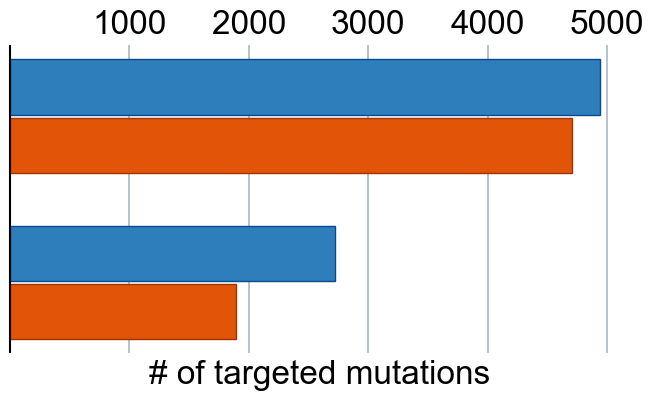

In [75]:
fig, ax = plt.subplots(figsize=(8,4))
x_h = [4944, 2720]

x = [4707,1892]

#list_of_y_loc_h = [0,
#  .6,
#  1.5,
#  2.0999999999999996,
#  2.6999999999999997,
#  3.3,
#  3.8999999999999995,
#  4.5]
# list_of_y_loc_m = [-.3, 0.3, 1.2, 1.7999999999999998, 2.4, 3.0, 3.5999999999999996, 4.2]
# list_of_y_loc_m = [x+.09 for x in list_of_y_loc_m]
ax.barh(list_of_y_loc_h[::-1], x_h, height = 0.2, color = plt.cm.Blues(0.7) , edgecolor = plt.cm.Blues(0.9))

ax.barh(list_of_y_loc_m[::-1], x, height = 0.2, color = plt.cm.Oranges(0.7) , edgecolor = plt.cm.Oranges(0.9))

ax.xaxis.set_ticks([1000,2000,3000,4000,5000])
ax.xaxis.set_ticklabels([1000,2000,3000,4000,5000], size=24, fontfamily="Arial", fontweight=100)
ax.xaxis.set_tick_params(labelbottom=False, labeltop=True, length=0)
#ax.set_ylim((.15, 1.05))
ax.set_axisbelow(True)
ax.grid(axis = "x", color="#A8BAC4", lw=1.2)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["left"].set_lw(1.5)
ax.spines["left"].set_capstyle("butt")
ax.set_xlabel(f"# of targeted mutations", fontsize=24)
ax.yaxis.set_visible(False)
plt.savefig(f'/Users/kexindong/Documents/GitHub/Output/h2m_database/pb_result.pdf', bbox_inches='tight')
plt.show()